# Road Vehicles Platooning using Multi-Agent Reinforcement Learning
**Statistical Machine Learning Project**\
 **Prepared by: Charbel ABI HANA**

# Table of Contents


## Intro 

## Reinforcement Learning

## Multi-Agent Reinforcement Learning

## OpenAI GYM

## Highway Environment

### Envrionment Overview

![highway-env](data/highway-env.gif)
<div class="alert alert-block alert-success">
<b>Highway-v0-environment:</b> Multilane highway environment where ego/agent vehicles navigate at high speeds while avoiding collisions with neighbouring vehicles.
</div>

![highway-env](data/merge-env.gif)
<div class="alert alert-block alert-success">
<b>Merge-v0-environment:</b> ego/agent vehicles approach a merging lane as they are travelling on a highway. Merging lanes have other vehicles coming out to merge on highway and agents should avoid those cars. 
</div>

### Action Space

### Observation Space

### Reward Function

### Multi-Agent Layout

### IDQN - Independant Agents - Development

In [18]:
import os

os.listdir("highway-env")

['.git',
 '.github',
 '.gitignore',
 'CITATION.cff',
 'codecov.yml',
 'docs',
 'highway_env',
 'LICENSE',
 'pyproject.toml',
 'README.md',
 'scripts',
 'setup.cfg',
 'setup.py',
 'tests']

In [1]:
# Environment
import gym
from gym import wrappers

import highway_env

# Agent
from stable_baselines3 import DQN

# Visualization utils
import tensorboard
import sys
from tqdm.notebook import trange

print(sys.path)
#sys.path.insert(0, "highway-env")
#from scripts.utils import record_videos, show_videos

['C:\\Users\\Charb\\Desktop\\Data\\Paris-Saclay\\ups-sml-marl', 'C:\\Users\\Charb\\Desktop\\SidewalkDetection-main', 'C:\\Users\\Charb\\anaconda3\\envs\\marl\\python37.zip', 'C:\\Users\\Charb\\anaconda3\\envs\\marl\\DLLs', 'C:\\Users\\Charb\\anaconda3\\envs\\marl\\lib', 'C:\\Users\\Charb\\anaconda3\\envs\\marl', '', 'C:\\Users\\Charb\\anaconda3\\envs\\marl\\lib\\site-packages', 'C:\\Users\\Charb\\anaconda3\\envs\\marl\\lib\\site-packages\\win32', 'C:\\Users\\Charb\\anaconda3\\envs\\marl\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Charb\\anaconda3\\envs\\marl\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Charb\\anaconda3\\envs\\marl\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Charb\\.ipython']


In [2]:
%load_ext tensorboard

In [3]:
%tensorboard --logdir "highway_dqn"

Reusing TensorBoard on port 6006 (pid 6620), started 1:18:11 ago. (Use '!kill 6620' to kill it.)

In [4]:
model = DQN('MlpPolicy', "highway-fast-v0",
                policy_kwargs=dict(net_arch=[256, 256]),
                learning_rate=5e-4,
                buffer_size=15000,
                learning_starts=200,
                batch_size=32,
                gamma=0.8,
                train_freq=1,
                gradient_steps=1,
                target_update_interval=50,
                exploration_fraction=0.7,
                verbose=1,
                tensorboard_log="highway_dqn/")
model.learn(int(2e4))

Using cpu device
Creating environment from the given name 'highway-fast-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


ImportError: Trying to log data to tensorboard but tensorboard is not installed.

In [9]:
env = gym.make("highway-fast-v0")
env = wrappers.Monitor(env, "./gym-results", force=True)
for episode in trange(3, desc="Test episodes"):
    obs, done = env.reset(), False
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
env.close()

Test episodes:   0%|          | 0/3 [00:00<?, ?it/s]

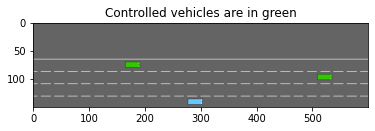

In [10]:
import gym
import highway_env

env = gym.make('highway-v0')
env.seed(0)

env.configure({"controlled_vehicles": 2})  # Two controlled vehicles
env.configure({"vehicles_count": 1})  # A single other vehicle, for the sake of visualisation
env.reset()

from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(env.render(mode="rgb_array"))
plt.title("Controlled vehicles are in green")
plt.show()

In [ ]:
# Multi-agent environment configuration
env.configure({
  "controlled_vehicles": 2,
  "observation": {
    "type": "MultiAgentObservation",
    "observation_config": {
      "type": "Kinematics",
    }
  },
  "action": {
    "type": "MultiAgentAction",
    "action_config": {
      "type": "DiscreteMetaAction",
    }
  }
})

In [ ]:
# Dummy RL algorithm
class Model:
    
    def predict(self, obs):
        return 0

    def update(self, obs, action, next_obs, reward, info, done):
        pass
    
model = Model()

In [ ]:
# A training episode
obs = env.reset()
done = False
while not done:
    # Dispatch the observations to the model to get the tuple of actions
    action = tuple(model.predict(obs_i) for obs_i in obs)
    # Execute the actions
    next_obs, reward, info, done = env.step(action)
    # Update the model with the transitions observed by each agent
    for obs_i, action_i, next_obs_i in zip(obs, action, next_obs):
        model.update(obs_i, action_i, next_obs_i, reward, info, done)
    obs = next_obs